In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import scikitlearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# import time to get the time
import time

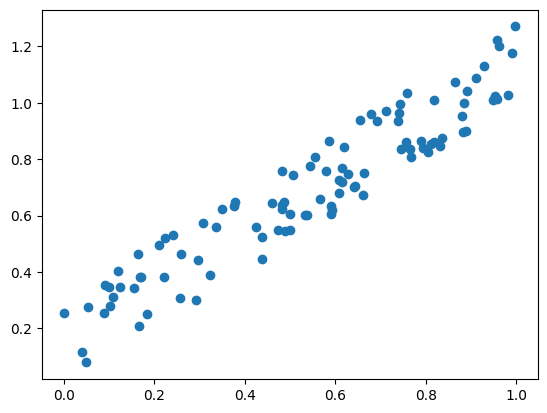

In [15]:
# generate a datasat that has a linear relationship, with a little noise, seed should be current time, rounded to whole number
np.random.seed(int(time.time()))
x = np.random.rand(100, 1)
y = x + np.random.uniform(low=0, high=0.1, size=(100, 1))*3

# plot the data
plt.scatter(x, y)

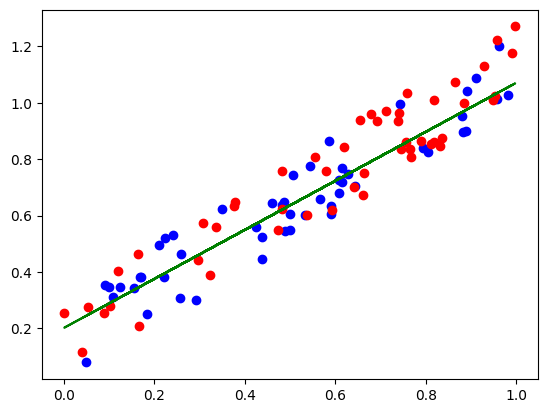

In [16]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
full_mse_list = []
full_x_train_list = []
full_x_test_list = []
full_y_train_list = []
full_y_test_list = []
full_predictions = []

iterations = 100

for i in range(iterations):
    mse_list = []
    x_train_list = []
    x_test_list = []
    y_train_list = []
    y_test_list = []
    predictions = []

    for test_size in test_sizes:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
        
        # Save the x and y train and test sets
        x_train_list.append(x_train)
        x_test_list.append(x_test)
        y_train_list.append(y_train)
        y_test_list.append(y_test)
        predictions.append(y_pred)
        
        # Show graph  for last iteration, specific with test size 0.5 contain:
        # Show x_train, y_train, x_test, y_test, and the prediction line specifically.
        if i == iterations - 1 and test_size == 0.5:
            plt.scatter(x_train, y_train, color='blue')
            plt.scatter(x_test, y_test, color='red')
            plt.plot(x_test, y_pred, color='green')
            plt.show()

    full_mse_list.append(mse_list)
    full_x_train_list.append(x_train_list)
    full_x_test_list.append(x_test_list)
    full_y_train_list.append(y_train_list)
    full_y_test_list.append(y_test_list)
    full_predictions.append(predictions)

Text(0.5, 1.0, 'Mean Squared Error vs Test Size')

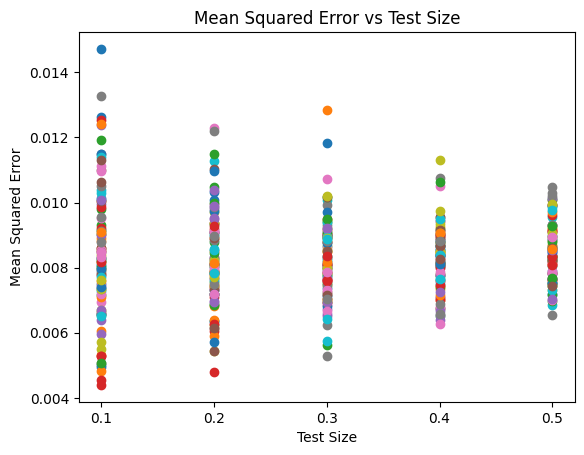

In [17]:
# plot the mse for each test size, only as points on a graph
list_for_1 = []
list_for_2 = []
list_for_3 = []
list_for_4 = []
list_for_5 = []

for i in range(iterations):
    plt.scatter(test_sizes, full_mse_list[i])
    
    # Add the mse values to the lists for each test size
    list_for_1.append(full_mse_list[i][0])
    list_for_2.append(full_mse_list[i][1])
    list_for_3.append(full_mse_list[i][2])
    list_for_4.append(full_mse_list[i][3])
    list_for_5.append(full_mse_list[i][4])

# Make x_ticks, only 0.1, 0.2, 0.3, 0.4, 0.5
plt.xticks(test_sizes)

# Add plot labels
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Test Size')

Text(0.5, 1.0, 'Mean Squared Error vs Test Size')

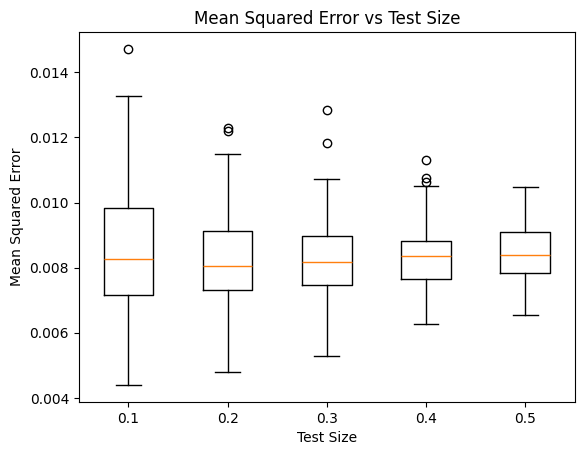

In [18]:
# Create a box plot for each test size on the same graph
plt.boxplot([list_for_1, list_for_2, list_for_3, list_for_4, list_for_5], labels=test_sizes) ### IF ERROR HERE: Change to tick_labels... Changed in 3.9 and is removed in 3.11 ###

# Add plot labels
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Test Size')

Training Set is in Blue,
Testing Set is in Red,
Prediction Line is in Green


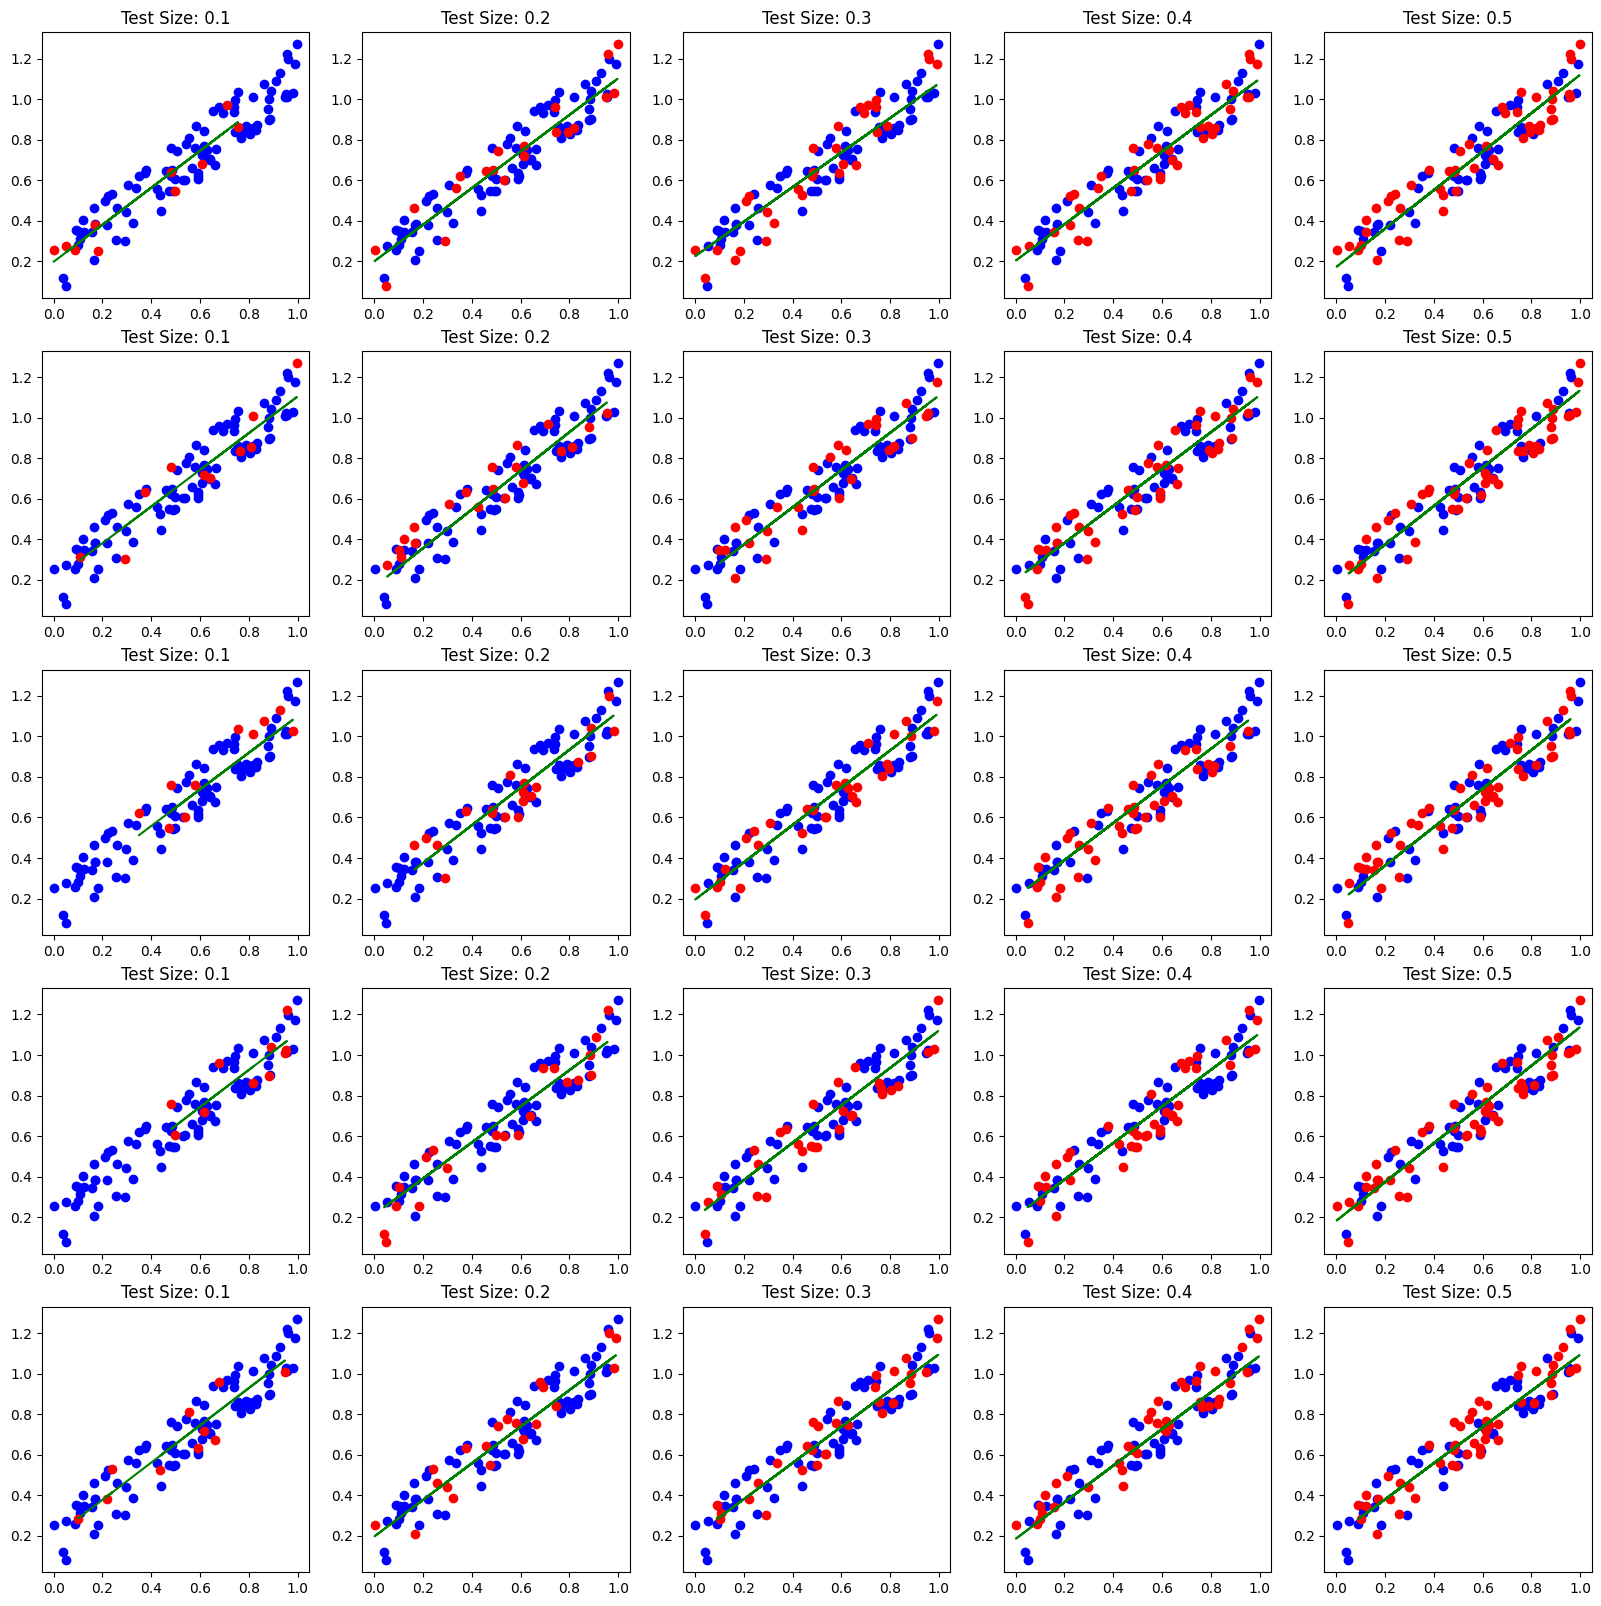

In [19]:
# Plot the first 16 predictions, in a 4x4 grid.
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    row = i
    col = i % 5
    # Plot the x_train, y_train, x_test, and y_test in the first row, in different colors.
    # Show 0.1, 0.2, 0.3, 0.4, 0.5 for each iteration
    axs[row, 0].scatter(full_x_train_list[i][0], full_y_train_list[i][0], color='blue')
    axs[row, 0].scatter(full_x_test_list[i][0], full_y_test_list[i][0], color='red')
    # Add title
    axs[row, 0].set_title('Test Size: ' + str(test_sizes[0]))
    
    axs[row, 1].scatter(full_x_train_list[i][1], full_y_train_list[i][1], color='blue')
    axs[row, 1].scatter(full_x_test_list[i][1], full_y_test_list[i][1], color='red')
    # Add title
    axs[row, 1].set_title('Test Size: ' + str(test_sizes[1]))
    
    axs[row, 2].scatter(full_x_train_list[i][2], full_y_train_list[i][2], color='blue')
    axs[row, 2].scatter(full_x_test_list[i][2], full_y_test_list[i][2], color='red')
    # Add title
    axs[row, 2].set_title('Test Size: ' + str(test_sizes[2]))
    
    axs[row, 3].scatter(full_x_train_list[i][3], full_y_train_list[i][3], color='blue')
    axs[row, 3].scatter(full_x_test_list[i][3], full_y_test_list[i][3], color='red')
    # Add title
    axs[row, 3].set_title('Test Size: ' + str(test_sizes[3]))
    
    axs[row, 4].scatter(full_x_train_list[i][4], full_y_train_list[i][4], color='blue')
    axs[row, 4].scatter(full_x_test_list[i][4], full_y_test_list[i][4], color='red')
    # Add title
    axs[row, 4].set_title('Test Size: ' + str(test_sizes[4]))
    
    # Plot the prediction line, which should be x_test vs y_pred, in green. (Straight line it should be...)
    axs[row, 0].plot(full_x_test_list[i][0], full_predictions[i][0], color='green')
    axs[row, 1].plot(full_x_test_list[i][1], full_predictions[i][1], color='green')
    axs[row, 2].plot(full_x_test_list[i][2], full_predictions[i][2], color='green')
    axs[row, 3].plot(full_x_test_list[i][3], full_predictions[i][3], color='green')
    axs[row, 4].plot(full_x_test_list[i][4], full_predictions[i][4], color='green')

print(f"Training Set is in Blue,\nTesting Set is in Red,\nPrediction Line is in Green")